In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np

In [2]:
# rename files
path = 'train/no_helmet/'
i=0
for file in os.listdir(path):
    my_dest = str(i) + ".jpg"
    my_source = path + file
    my_dest = path + my_dest
    os.rename(my_source, my_dest)
    i += 1

In [3]:
for file in os.listdir(path):
    print(file)

8.jpg
9.jpg
4.jpg
5.jpg
7.jpg
6.jpg


In [4]:
cv2.imread('train/helmet/1.jpg').shape

(2531, 3375, 3)

In [5]:
cv2.imread('train/helmet/1.jpg')

array([[[194, 194, 194],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [174, 174, 174],
        [174, 174, 174],
        [174, 174, 174]],

       [[194, 194, 194],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [174, 174, 174],
        [174, 174, 174],
        [174, 174, 174]],

       [[194, 194, 194],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [174, 174, 174],
        [174, 174, 174],
        [174, 174, 174]],

       ...,

       [[181, 181, 181],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [168, 168, 168]],

       [[180, 180, 180],
        [180, 180, 180],
        [180, 180, 180],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [168, 168, 168]],

       [[178, 178, 178],
        [178, 178, 178],
        [178, 178, 178],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [168, 168, 168]]

In [15]:
train = ImageDataGenerator(rescale=1/194)
validation = ImageDataGenerator(rescale=1/194)

In [16]:
train_dataset = train.flow_from_directory('train/', target_size=(330, 250), batch_size=3, class_mode='binary')

validation_dataset = validation.flow_from_directory('validate/', target_size=(330, 250), batch_size=3, class_mode='binary')

Found 18 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'helmet': 0, 'no_helmet': 1}

In [18]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(330, 250, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # 
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [20]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 20,
                     validation_data = validation_dataset)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fdbafa8f1d0>

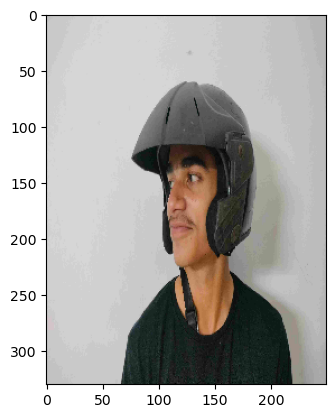

1/1 [==============================] - 0s 116ms/step
helmet


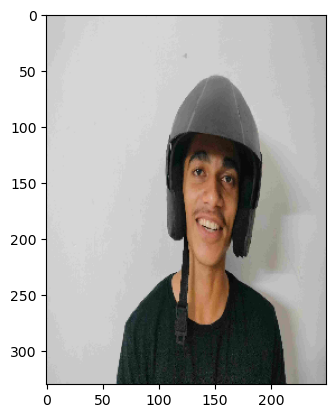

1/1 [==============================] - 0s 52ms/step
helmet


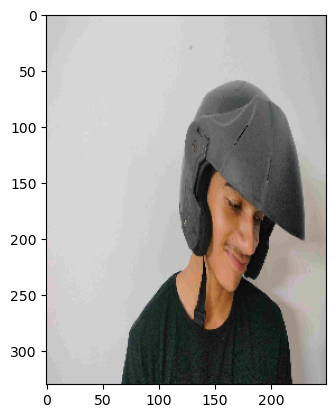

1/1 [==============================] - 0s 37ms/step
helmet


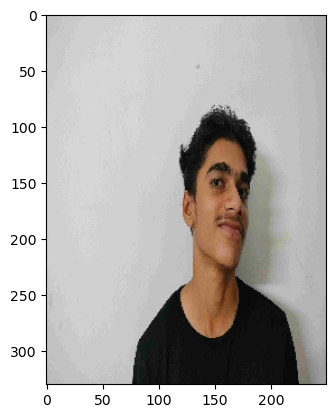

1/1 [==============================] - 0s 48ms/step
helmet


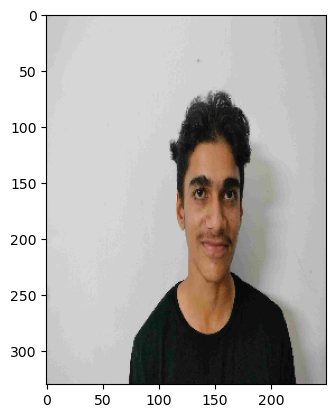

1/1 [==============================] - 0s 41ms/step
helmet


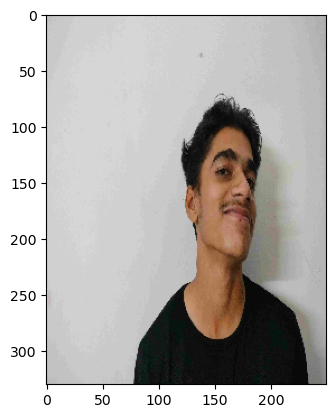

1/1 [==============================] - 0s 40ms/step
helmet


In [14]:
dir_path = 'test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+i, target_size=(330, 250, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print('helmet')
    else:
        print('no helmet')
    